In [1]:
import pandas as pd
import numpy as np

from collections import Counter
import codecs
import nltk
#nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt

/home/luci/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/home/luci/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict
/home/luci/anaconda3/lib/python3.7/site-packages/nltk/lm/vocabulary.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Counter, Iterable


In [76]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

english_stopwords = set(stopwords.words('english'))

with codecs.open("trump_position_papers.txt", "r", "utf-8-sig") as text_file:
    pp = text_file.read()
    
with codecs.open("trump_speeches.txt", "r", "utf-8-sig") as text_file:
    s = text_file.read()
    
with codecs.open("trump_remarks.txt", "r", "utf-8-sig") as text_file:
    re = text_file.read()
    
r = pp + s + re

tokenizer = RegexpTokenizer(r'\w+')
_tokens = tokenizer.tokenize(r)
tokens = [t for t in _tokens if t.lower() not in english_stopwords]

In [72]:
density_text = r[:9765973]

tokenizer = RegexpTokenizer(r'\w+')
_density_tokens = tokenizer.tokenize(density_text)
density_tokens = [t for t in _density_tokens if t.lower() not in english_stopwords]

[2.3922502488629687]


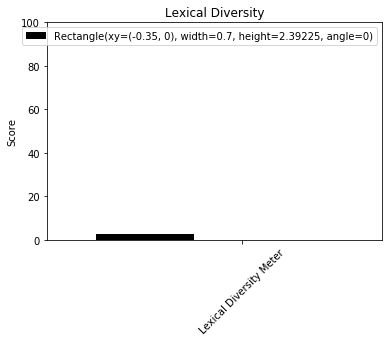

In [73]:
st = len(set(density_tokens))
lt = len(density_tokens)
y = [st*100/lt]
print(y)

fig = plt.figure()
ax = fig.add_subplot(111)
N = 1
ind = np.arange(N)
width = 0.7
rect = ax.bar(ind, y, width, color="black")
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,100)
ax.set_ylabel("Score")
ax.set_title("Lexical Diversity")
xTickMarks = ["Lexical Diversity Meter"]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
ax.legend( (rect[0], ("") ))
plt.show()

In [4]:
tagged = nltk.pos_tag(tokens)
counts = Counter(tag for word,tag in tagged)
keys = counts.keys()
y_pos = np.arange(len(keys))
p = [counts[k] for k in keys]
error = np.random.rand(len(keys))

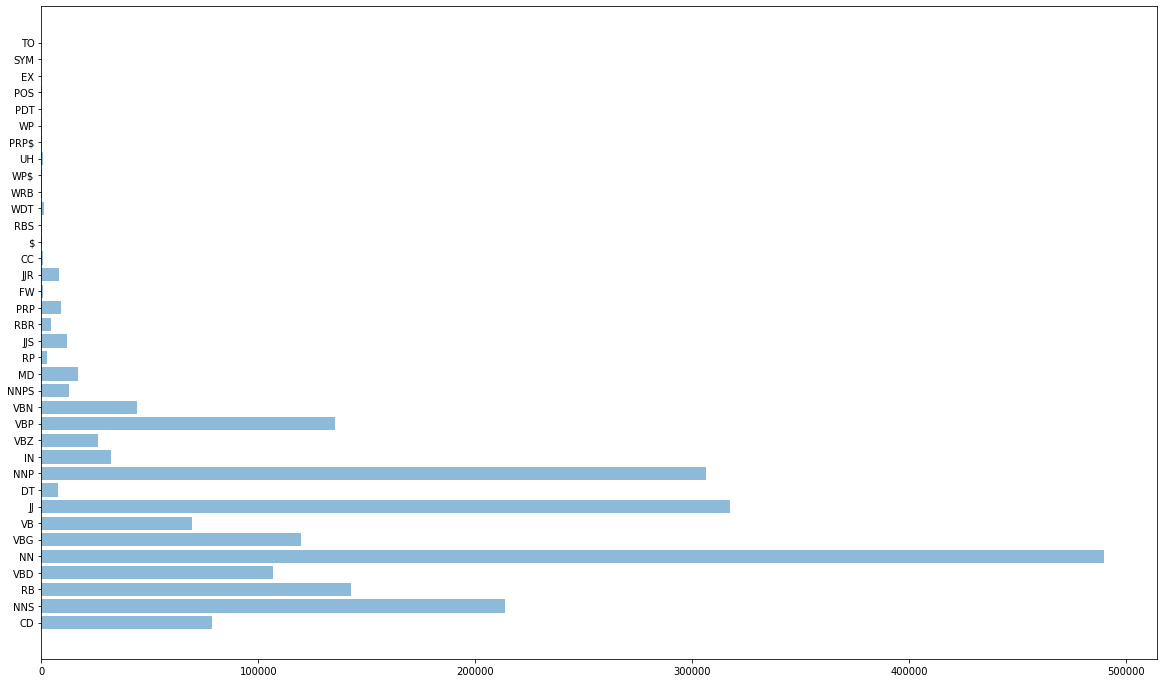

In [5]:
plt.figure(figsize=(20, 12))

y_pos = np.arange(len(keys))

plt.barh(y_pos, p, align='center', alpha=0.5)
plt.yticks(y_pos, keys)

plt.show()

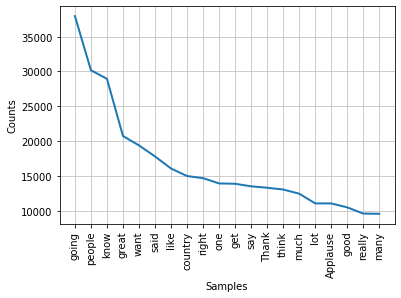

In [6]:
dist = nltk.FreqDist(tokens)
dist.plot(20, cumulative=False);

In [56]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/luci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [62]:
lem_tokens = []
for token in tokens:
    lem_tokens.append(lemmatizer.lemmatize(token))

In [63]:
lem_text = nltk.Text(lem_tokens)
print("\n".join(lem_text.collocation_list(num=20)))

United States
Thank much
Hillary Clinton
New York
little bit
White House
want thank
long time
God bless
Middle East
law enforcement
Donald Trump
year ago
take care
Supreme Court
Thank Thank
tax cut
Second Amendment
New Hampshire
friend mine


In [7]:
text = nltk.Text(_tokens)
print("\n".join(text.collocation_list(num=20)))

United States
Hillary Clinton
New York
little bit
White House
long time
law enforcement
take care
years ago
God bless
Donald Trump
Middle East
Supreme Court
New Hampshire
Second Amendment
make America
Prime Minister
African American
trade deals
tax cuts


In [69]:
from nltk.util import ngrams

In [70]:
output = list(ngrams(tokens, 3))
output

[('One', 'hundred', 'days'),
 ('hundred', 'days', 'ago'),
 ('days', 'ago', 'took'),
 ('ago', 'took', 'oath'),
 ('took', 'oath', 'office'),
 ('oath', 'office', 'made'),
 ('office', 'made', 'pledge'),
 ('made', 'pledge', 'merely'),
 ('pledge', 'merely', 'going'),
 ('merely', 'going', 'transfer'),
 ('going', 'transfer', 'political'),
 ('transfer', 'political', 'power'),
 ('political', 'power', 'one'),
 ('power', 'one', 'party'),
 ('one', 'party', 'another'),
 ('party', 'another', 'instead'),
 ('another', 'instead', 'going'),
 ('instead', 'going', 'transfer'),
 ('going', 'transfer', 'power'),
 ('transfer', 'power', 'Washington'),
 ('power', 'Washington', 'C'),
 ('Washington', 'C', 'give'),
 ('C', 'give', 'back'),
 ('give', 'back', 'people'),
 ('back', 'people', 'past'),
 ('people', 'past', '100'),
 ('past', '100', 'days'),
 ('100', 'days', 'kept'),
 ('days', 'kept', 'promise'),
 ('kept', 'promise', 'Issue'),
 ('promise', 'Issue', 'issue'),
 ('Issue', 'issue', 'department'),
 ('issue', 'dep

In [71]:
def count_grams(value_list):
    values = {}
    for gram in value_list:
        if gram not in values.keys():
            values[gram] = 1
        else:
            values[gram] += 1
    values_sorted = collections.OrderedDict(sorted(values.items(), key=operator.itemgetter(1), reverse=True))
    return values_sorted

count_grams(output)

OrderedDict([(('Thank', 'much', 'Thank'), 968),
             (('Thank', 'Thank', 'much'), 764),
             (('make', 'America', 'great'), 591),
             (('going', 'take', 'care'), 428),
             (('Thank', 'much', 'everybody'), 371),
             (('Thank', 'Thank', 'Thank'), 368),
             (('short', 'period', 'time'), 355),
             (('many', 'many', 'years'), 307),
             (('much', 'Thank', 'much'), 295),
             (('United', 'States', 'America'), 288),
             (('Well', 'thank', 'much'), 280),
             (('going', 'build', 'wall'), 276),
             (('much', 'Thank', 'Thank'), 271),
             (('going', 'make', 'America'), 259),
             (('New', 'York', 'Times'), 255),
             (('Make', 'America', 'Great'), 248),
             (('seen', 'anything', 'like'), 246),
             (('want', 'thank', 'everybody'), 235),
             (('bring', 'jobs', 'back'), 234),
             (('bring', 'back', 'jobs'), 227),
             (('Thank', '

In [8]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

/home/luci/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/luci/anaconda3/lib/python3.7/site-packages/thinc/neural/_custom_kernels.py:36: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/luci/anaconda3/lib/python3.7/site-packages/thinc/neural/_custom_kernels.cu' mode='r' encoding='utf8'>
  SRC = (PWD / "_custom_kernels.cu").open("r", encoding="utf8").read()
/home/luci/anaconda3/lib/python3.7/site-packages/thinc/neural/_custom_kernels.py:39: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/luci/anaconda3/lib/python3.7/site-packages/thinc/neural/_murmur3.cu' mode='r' encoding='utf8'>
  MMH_SRC = (PWD / "_murmur3.cu").open("r", encoding="utf8").read()


In [9]:
locations = []
organizations = []
persons = []
dates = []
times = []
percents = []
facilities = []
gpes = []
ordinals = []
cardinals = []
norps = []
moneys = []
laws = []
products = []
quantities = []

In [10]:
nlp.max_length = 19000000

In [11]:
splitted_text = r.split(" ")

In [12]:
len(r)/20

1260074.9

In [13]:
len(splitted_text)/20

227831.8

In [14]:
part1, part2, part3, part4, part5, part6, part7, part8, part9, part10, part11, part12, part13, part14, part15, part16, part17, part18, part19, part20 = [splitted_text[i:i + 227832] for i in range(0, len(splitted_text), 227832)]

In [15]:
len(part6)

227832

In [16]:
part1 = " ".join(part1)

In [17]:
part2 = " ".join(part2)

In [18]:
part3 = " ".join(part3)

In [19]:
part4 = " ".join(part4)

In [20]:
part5 = " ".join(part5)

In [21]:
part6 = " ".join(part6)

In [22]:
part7 = " ".join(part7)
part8 = " ".join(part8)
part9 = " ".join(part9)
part10 = " ".join(part10)

part11 = " ".join(part11)
part12 = " ".join(part12)
part13 = " ".join(part13)
part14 = " ".join(part14)
part15 = " ".join(part15)
part16 = " ".join(part16)
part17 = " ".join(part17)
part18 = " ".join(part18)
part19 = " ".join(part19)
part20 = " ".join(part20)


In [23]:
#chunks = [(X.text, X.label_) for X in nlp(r).ents]
chunk1 = [(X.text, X.label_) for X in nlp(part1).ents]

In [24]:
chunk2 = [(X.text, X.label_) for X in nlp(part2).ents]

In [25]:
chunk3 = [(X.text, X.label_) for X in nlp(part3).ents]

In [26]:
chunk4 = [(X.text, X.label_) for X in nlp(part4).ents]

In [27]:
chunk5 = [(X.text, X.label_) for X in nlp(part5).ents]

In [28]:
chunk6 = [(X.text, X.label_) for X in nlp(part6).ents]

In [29]:
chunk7 = [(X.text, X.label_) for X in nlp(part7).ents]

In [30]:
chunk8 = [(X.text, X.label_) for X in nlp(part8).ents]

In [31]:
chunk9 = [(X.text, X.label_) for X in nlp(part9).ents]

In [32]:
chunk10 = [(X.text, X.label_) for X in nlp(part10).ents]

In [33]:
chunk11 = [(X.text, X.label_) for X in nlp(part11).ents]

In [34]:
chunk12 = [(X.text, X.label_) for X in nlp(part12).ents]

In [35]:
chunk13 = [(X.text, X.label_) for X in nlp(part13).ents]

In [36]:
chunk14 = [(X.text, X.label_) for X in nlp(part14).ents]

In [37]:
chunk15 = [(X.text, X.label_) for X in nlp(part15).ents]

In [38]:
chunk16 = [(X.text, X.label_) for X in nlp(part16).ents]

In [39]:
chunk17 = [(X.text, X.label_) for X in nlp(part17).ents]

In [40]:
chunk18 = [(X.text, X.label_) for X in nlp(part18).ents]

In [41]:
chunk19 = [(X.text, X.label_) for X in nlp(part19).ents]

In [42]:
chunk20 = [(X.text, X.label_) for X in nlp(part20).ents]

In [43]:
list_of_chunks = [chunk1, chunk2, chunk3, chunk4, chunk5, chunk6, chunk7, chunk8, chunk9, chunk10, chunk11, chunk12, chunk13, chunk14, chunk15, chunk16, chunk17, chunk18, chunk19, chunk20]

for chunks in list_of_chunks:
    for chunk in chunks:
        if chunk[1] == "PERSON": 
            persons.append(chunk[0])
        if chunk[1] == "LOC": 
            locations.append(chunk[0])
        if chunk[1] == "ORG": 
            organizations.append(chunk[0])
        if chunk[1] == "DATE": 
            dates.append(chunk[0])
        if chunk[1] == "TIME": 
            times.append(chunk[0])
        if chunk[1] == "PERCENT": 
            percents.append(chunk[0])
        if chunk[1] == "FAC": 
            facilities.append(chunk[0])
        if chunk[1] == "GPE": 
            gpes.append(chunk[0])
        if chunk[1] == "MONEY":
            moneys.append(chunk[0])
        if chunk[1] == "LAW":
            laws.append(chunk[0])
        if chunk[1] == "CARDINAL":
            cardinals.append(chunk[0])
        if chunk[1] == "NORP":
            norps.append(chunk[0])
        if chunk[1] == "ORDINAL":
            ordinals.append(chunk[0])
        if chunk[1] == "PRODUCT":
            products.append(chunk[0])
        if chunk[1] == "QUANTITY":
            quantities.append(chunk[0])

In [44]:
import collections
import operator

def count_words(value_list):
    values = {}
    for word in value_list:
        if word not in values.keys():
            values[word] = 1
        else:
            values[word] += 1
    values_sorted = collections.OrderedDict(sorted(values.items(), key=operator.itemgetter(1), reverse=True))
    return values_sorted

In [45]:
person_counts = count_words(persons)
location_counts = count_words(locations)
organization_counts = count_words(organizations)
facility_counts = count_words(facilities)
gpe_counts = count_words(gpes)
norp_counts = count_words(norps)

In [66]:
facility_counts

OrderedDict([('the White House', 355),
             ('Trump Tower', 71),
             ('Pennsylvania Avenue', 66),
             ('Pearl Harbor', 26),
             ('Fifth Avenue', 25),
             ('the Panama Canal', 21),
             ('the West Side Highway', 20),
             ('the Great Wall of China', 20),
             ('Capitol', 17),
             ('Park Avenue', 17),
             ('the United Nations', 15),
             ('VA', 14),
             ('America Great', 12),
             ('Main Street', 12),
             ('Vatican', 12),
             ('Camp Lejeune', 11),
             ('the Cabinet Room', 11),
             ('5th Avenue', 10),
             ('Camp David', 10),
             ('Barack Obama', 10),
             ('the Rose Garden', 10),
             ('The Great Wall of China', 9),
             ('Broadway', 8),
             ('the Great Lakes', 8),
             ('the Academy Awards', 8),
             ('the Empire State Building', 8),
             ('the Golden Gate Bridge', 8),


In [47]:
#displacy.render(nlp(str(r)), jupyter=True, style='ent')

In [48]:
#displacy.render(nlp(str(r)), style='dep', jupyter = True, options = {'distance': 120})

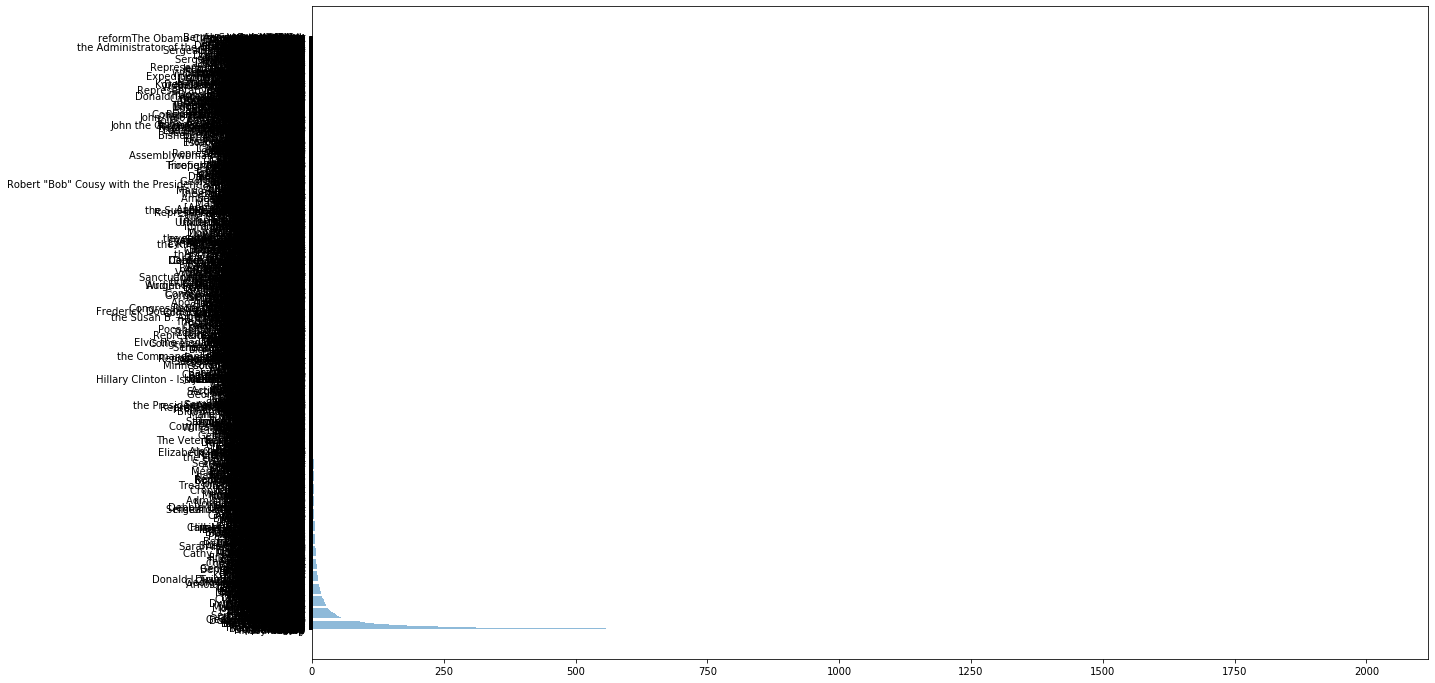

In [48]:
plt.figure(figsize=(20, 12))

y_pos = np.arange(len(person_counts.keys()))

plt.barh(y_pos, person_counts.values(), align='center', alpha=0.5)
plt.yticks(y_pos, person_counts.keys())

plt.show()

In [50]:
from pymarkovchain import MarkovChain
mc = MarkovChain()
for i in range(1,30):
    mc.generateDatabase(r)
    g = mc.generateString()
    print(g)

/home/luci/anaconda3/lib/python3.7/site-packages/pymarkovchain/MarkovChain.py:54: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn('Database file corrupt or not found, using empty database')


But there is no way to achieve peace, they've got their number one crop, American soybeans
Every time I speak, and as Americans
We shouldn't have been agreed to is we have
I'll be able to make our country
They probably knew it, and then the other candidates that's strong of the bloodiest civil wars in Iraq from the private sector investment, including zero capital gains held until death and destruction
I love our country, who've bleeding Pennsylvania, who've been bleeding our country, and they're paying him hundreds of billions and billions of dollars' worth of work, the bet that's - and they promised 250,000 jobs
So, you know, I liked him but he's an incredible job, by the time we finish, I think the number of times in the same thing we really have seen the best-in-class things that I was your deal -- is possible
And that's what I said I don't want to take a look at this, I never had anything like that
You can go out to be as careful as you can add another $10 trillion
Congratulate yo

In [51]:
from textgenrnn import textgenrnn

textgen = textgenrnn()
textgen.generate()

Using TensorFlow backend.
/home/luci/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/luci/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/backend.py:5851: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/luci/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))
/home/luci/anaconda3/lib/python3.7/site-packages/keras/engine/training_utils.py:811: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(loss, collections.Mapping):


How super looking for a break of the state of this subreddit to say they were threatened by a coworker before the best for a shit.



In [52]:
textgen.train_from_file('trump.txt', num_epochs=1)
textgen.generate()

AttributeError: 'textgenrnn' object has no attribute 'train'

In [75]:
import textstat

/home/luci/anaconda3/lib/python3.7/site-packages/textstat/textstat.py:20: ResourceWarning: unclosed file <_io.BufferedReader name='/home/luci/anaconda3/lib/python3.7/site-packages/textstat/easy_words.txt'>
  pkg_resources.resource_stream('textstat', 'easy_words.txt')


In [77]:
textstat.flesch_reading_ease(r)

73.88

In [78]:
textstat.smog_index(r)

9.1

In [79]:
textstat.flesch_kincaid_grade(r)

6.5

In [80]:
textstat.text_standard(r)

'6th and 7th grade'